# PROJET BI423 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
La séquence est valide.
La séquence fait 55 paires de bases
Positions potentielles de l'origine de réplication basées sur l'écart de CG: [0]


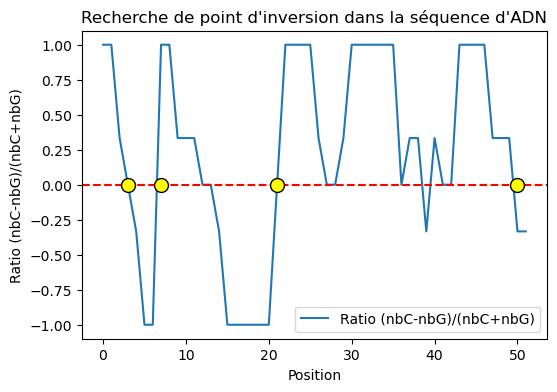

In [2]:
import tkinter as tk
from tkinter import messagebox, filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

def plot_dna_skew(skew, peaks, seq):
    fig = Figure(figsize=(10, 6), dpi=100)
    plot = fig.add_subplot(1, 1, 1)
    plot.plot(skew, lw=1)
    plot.scatter(peaks, [skew[i] for i in peaks], color='yellow', zorder=5)
    plot.set_title("DNA Skew (G-C) along the Sequence")
    plot.set_xlabel("Position in Sequence")
    plot.set_ylabel("Cumulative Skew (G-C)")
    plot.grid(True)
    plot.text(0, min(skew), seq, fontsize=8, horizontalalignment='left', verticalalignment='bottom', wrap=True)

    return fig

def show_graph(skew, peaks, seq):
    clear_graph()
    fig = plot_dna_skew(skew, peaks, seq)
    canvas = FigureCanvasTkAgg(fig, master=accueil)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
    graph_canvas.append(canvas)

def clear_graph():
    for canvas in graph_canvas:
        canvas.get_tk_widget().destroy()
    graph_canvas.clear()

def calculate_dna_skew(seq):
    skew = [0]
    for i in range(1, len(seq)):
        if seq[i] == 'G':
            skew.append(skew[i-1] + 1)
        elif seq[i] == 'C':
            skew.append(skew[i-1] - 1)
        else:
            skew.append(skew[i-1])
    return skew

def find_peaks(skew):
    peaks = []
    for i in range(1, len(skew)-1):
        if skew[i] > skew[i-1] and skew[i] > skew[i+1]:
            peaks.append(i)
    return peaks

def detect_change_points(skew):
    change_points = []
    for i in range(1, len(skew)-1):
        if (skew[i] > skew[i-1] and skew[i] > skew[i+1]) or (skew[i] < skew[i-1] and skew[i] < skew[i+1]):
            change_points.append(i)
    return change_points

def detect_derivative_change_points(derivative):
    change_points = []
    for i in range(1, len(derivative)-1):
        if derivative[i] * derivative[i-1] < 0:
            change_points.append(i)
    return change_points

def seq_init():
    seq = ''
    if choix_entree.get() == "Fichier":
        nom_fichier = entree_seq.get()
        seq = lecture(nom_fichier)
    else:
        seq = entree_seq.get().upper().replace(' ', '').replace('\n', '')

    if verifier_sequence(seq, type_seq.get()):
        messagebox.showinfo("Succès", "La séquence est valide.")
        entree_seq.delete(0, tk.END)
        skew = calculate_dna_skew(seq)
        peaks = detect_derivative_change_points(skew)
        show_graph(skew, peaks, seq)
        if len(peaks) == 1:
            messagebox.showinfo("Info", f"Position probable d'une origine de réplication : {peaks[0]}")
        elif len(peaks) > 1:
            messagebox.showerror("Erreur", "Erreur d'analyse : plusieurs points de rebroussement trouvés.")
        else:
            messagebox.showerror("Erreur", "Erreur d'analyse : aucun point de rebroussement trouvé.")
    else:
        entree_seq_var.set("")

def lecture(nom_fichier):
    try:
        with open(nom_fichier, 'r') as fichier:
            seq = fichier.read().replace('\n', '').upper()
        return seq
    except FileNotFoundError:
        messagebox.showerror("Erreur", "Fichier non trouvé.")
        return ''

def verifier_sequence(seq, type_seq):
    valides = {'ADN': 'ATGC'}
    for nucleotide in seq:
        if nucleotide not in valides[type_seq]:
            messagebox.showerror("Erreur", f"La séquence contient des caractères non valides pour {type_seq}. Veuillez saisir une séquence d'ADN valide.")
            return False
    return True

accueil = tk.Tk()
accueil.title("Analyse de séquence")
accueil.geometry("800x800")

entree_seq_var = tk.StringVar()

choix_entree = tk.StringVar(value="Directe")
tk.Radiobutton(accueil, text="Entrer Séquence Directement", variable=choix_entree, value="Directe").pack(anchor=tk.W)
tk.Radiobutton(accueil, text="Charger Fichier", variable=choix_entree, value="Fichier").pack(anchor=tk.W)

entree_seq = tk.Entry(accueil, textvariable=entree_seq_var)
entree_seq.pack()

type_seq_frame = tk.Frame(accueil)
type_seq = tk.StringVar(value="ADN")
for seq_type in ["ADN"]:
    tk.Radiobutton(type_seq_frame, text=seq_type, variable=type_seq, value=seq_type).pack(anchor=tk.W)
type_seq_frame.pack()

tk.Button(accueil, text="Valider", command=seq_init).pack(side=tk.TOP)

graph_canvas = []

accueil.mainloop()


ctaccggaaa ccgtctgggg agaaccccag acccccatcg ctgcaacacc gacggtctac
gaccacctac caaccgcatg gctgcctgtt ccgtgcaaat gggctttgca gggggctggc
gcggttcctg gcgacctgaa agcccctggt taggggtatc ggcgcgcttg acctcctgag
agcctctgta agcgtttttc gcgccttcca tgccctggcg ggcatctaaa acccgtttcg
tgcgtctgag agcttttgag cgcgtttgag gggctatctg gcgactcatc cccaaaagaa
caacaccggg atcaccgaca acatgcgaga ggtgatcccg ctcgccgcaa gtcgatgacc
gagcgtagcg agcgaatcga cgaggaagcg gaagagaacc ggaagccaca ttgagcactt
acgcactgat gcggggtgtc ggggtgaagc cctgaccaag tggtaatcgt atcggcgtgc
atgcgcggtt atacgattac acatcctgtc ccgatttctg aggcgtttta acggtgaacg
gacggcaaaa acacgatgga gctgttgaac gtgaaaacca cgaaatctgg caaaaatcac
ggctggcgag gcttgcatag gagtaagcca gtatacactc cgctatcgct acgtgactgg
ttcagggctt cgcccgacac ccccaaaggg cgttgcgttg cacgcaacac ccttgcctag
aatagatctt ttacgccgat ttgtaagtgg ttgttttttt agtgtgtttt ttatttacct
gtcgcatcca ggatgaaaca acgttgtcgc atcctggatg cgacaacacg caacaaggtg
ttgcacagat gtgtcatgat ggcttagatt tgaaccaacg ttagtgcatg ggattttcag
agggaaaaaa tcatgtttat tgattcagaa aaacgactga aacaactttc agatgaggca
aagaaaaaca ccgaggatct cgaagaagca aagaaaaatt caaggtttac acaggtatcc
caaaaggtt gggaacgtgt tcgagagctg ctgaaggata gccaaggcat atcagcactg
aagctgtact catttttagc ggagcatatc gatcctacgt gtggcgctgt cgttgcggat
cagcaattcc tagctgaaaa acttggagtt agcagaagca caattattcg gtggctcaat
tacttagaat caaaaaatgc attagttaga atccccgttg ctggtaaggt ttgtgcgtat
gccctcgatc cacatgaagt ctggaaggga tacaacacta cgaaaaacca tgcagcgttt
gtcactaaaa cactggtcaa caaagacggt gatattcagc gccgaatcat ggccatgttt
tcaaattgag ctagcggcag gcggacaatc aggggctacg tgttaacgtt ctagaccatg
attgtctatc ctgcattgct cttttgccgc ctcaaaatcc tttgcgtgtt tttgctcccc
gttctccaga aaaaaccgag ccgccacggt tccggcagcg ccttgagcg
